In [37]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
data = pd.read_csv("/content/train_news.csv")

In [39]:
data.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [40]:
data.tail()

,Unnamed: 0,id,headline,written_by,news,label
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0
20799,20799,15660,Emory University to Pay for ’100 Percent’ of U...,Tom Ciccotta,"Emory University in Atlanta, Georgia, has anno...",0


In [41]:
data.shape

(20800, 6)

In [42]:
data.columns

Index(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label'], dtype='object')

In [43]:
data.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [44]:
data.nunique()

Unnamed: 0    20800
id            20800
headline      19803
written_by     4201
news          20386
label             2
dtype: int64

In [45]:
data.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [46]:
data.head()

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [47]:
data.dropna(inplace=True)

In [48]:
data.shape

(18285, 4)

In [49]:
# Checking datatype 
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   headline    18285 non-null  object
 1   written_by  18285 non-null  object
 2   news        18285 non-null  object
 3   label       18285 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 714.3+ KB


In [50]:
# Checking null values 
data.isnull().sum()

headline      0
written_by    0
news          0
label         0
dtype: int64

In [51]:
# Drop null values 
data.dropna(axis=1,inplace=True)

In [52]:
# Checking length of the masseges
data['length'] = data['news'].apply(len)
data.head()

,headline,written_by,news,label,length
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,7936
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,6112
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,425
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,6516
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,9164


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda5f90e050>,
      dtype=object)

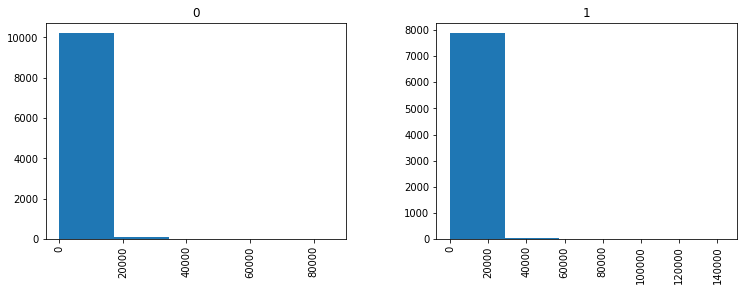

In [53]:

# plot masseges length and label 
data.hist(column = 'length', by ='label',figsize=(12,4), bins = 5)

In [54]:
def pre_process(message):
    
    text = message.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in message.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [55]:
# Vectorize our massges data & Splitting that data in test and train 
textFeatures = data['news'].copy()
textFeatures = textFeatures.apply(pre_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(textFeatures)

features_train, features_test, labels_train, labels_test = train_test_split(features, data['label'], test_size=0.3, random_state=33)

In [56]:
# Applying svc to predict our model ..............
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
accuracy_score(labels_test,prediction)

0.960262486328837

In [57]:
# Applying MultinomialNB to predict our data ........
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=0.2)
mnb.fit(features_train, labels_train)
prediction = mnb.predict(features_test)
accuracy_score(labels_test,prediction)

0.8756835581480131